In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
train = pd.read_csv('trainDS.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
LA = pd.DataFrame(train['LotArea'])
GLA = pd.DataFrame(train['GrLivArea'])
TBSF = pd.DataFrame(train['TotalBsmtSF'])
GA = pd.DataFrame(train['GarageArea'])

f,axes = plt.subplots(1,1, figsize = (12,6))
sb.boxplot(data = LA,orient = "h")

f,axes = plt.subplots(1,1, figsize = (12,6))
sb.boxplot(data = GLA,orient = "h")

f,axes = plt.subplots(1,1, figsize = (12,6))
sb.boxplot(data = TBSF,orient = "h")

f,axes = plt.subplots(1,1, figsize = (12,6))
sb.boxplot(data = GA,orient = "h")

NameError: name 'train' is not defined

In [18]:
Q1LA = LA.quantile(0.25)
Q3LA = LA.quantile(0.75)
IQRLA = Q3LA - Q1LA
((LA < (Q1LA-1.5*IQRLA))|(LA>(Q3LA+1.5*IQRLA))).sum()

LotArea    69
dtype: int64

In [12]:
Q1TBSF = TBSF.quantile(0.25)
Q3TBSF = TBSF.quantile(0.75)
IQRTBSF = Q3TBSF - Q1TBSF
((TBSF < (Q1TBSF-1.5*IQRTBSF))|(TBSF>(Q3TBSF+1.5*IQRTBSF))).sum()

TotalBsmtSF    61
dtype: int64

In [13]:
Q1GA = GA.quantile(0.25)
Q3GA = GA.quantile(0.75)
IQRGA = Q3GA - Q1GA
((GA < (Q1GA-1.5*IQRGA))|(GA>(Q3GA+1.5*IQRGA))).sum()

GarageArea    21
dtype: int64

In [14]:
Q1GLA = GLA.quantile(0.25)
Q3GLA = GLA.quantile(0.75)
IQRGLA = Q3GLA - Q1GLA
((GLA < (Q1GLA-1.5*IQRGLA))|(GLA>(Q3GLA+1.5*IQRGLA))).sum()

GrLivArea    31
dtype: int64

LotArea has the maximum number of outliers as per boxplot with 69 outliers.

In [19]:
LA.describe()
#diff = 1038

,LotArea
count,1460.000000
mean,10516.828082
std,9981.264932
min,1300.000000
25%,7553.500000
50%,9478.500000
75%,11601.500000
max,215245.000000


In [28]:
GA.describe()
#diff = -8.

,GarageArea
count,1460.000000
mean,472.980137
std,213.804841
min,0.000000
25%,334.500000
50%,480.000000
75%,576.000000
max,1418.000000


In [21]:
GLA.describe()
#diff = 51

,GrLivArea
count,1460.000000
mean,1515.463699
std,525.480383
min,334.000000
25%,1129.500000
50%,1464.000000
75%,1776.750000
max,5642.000000


In [22]:
TBSF.describe()
#diff = 66

,TotalBsmtSF
count,1460.000000
mean,1057.429452
std,438.705324
min,0.000000
25%,795.750000
50%,991.500000
75%,1298.250000
max,6110.000000


LotArea. The skew is positive.

In [29]:
SP = pd.DataFrame(train['SalePrice'])

In [30]:
jointSPLA = pd.concat([SP, LA], axis = 1)
jointSPLA.corr()

,SalePrice,LotArea
SalePrice,1.000000,0.263843
LotArea,0.263843,1.000000


In [34]:
jointSPGA = pd.concat([SP, GA], axis = 1)
jointSPGA.corr()

,SalePrice,GarageArea
SalePrice,1.000000,0.623431
GarageArea,0.623431,1.000000


In [35]:
jointSPGLA = pd.concat([SP, GLA], axis = 1)
jointSPGLA.corr()

,SalePrice,GrLivArea
SalePrice,1.000000,0.708624
GrLivArea,0.708624,1.000000


In [36]:
jointSPTBSF = pd.concat([SP, TBSF], axis = 1)
jointSPTBSF.corr()

,SalePrice,TotalBsmtSF
SalePrice,1.000000,0.613581
TotalBsmtSF,0.613581,1.000000


GrLivArea and GarageArea are the top two variables to predict SalePrice

In [41]:
MS = pd.DataFrame(train['MSSubClass'])
N = pd.DataFrame(train['Neighborhood'])
BLT = pd.DataFrame(train['BldgType'])
OQ = pd.DataFrame(train['OverallQual'])

In [44]:
print("MSSubClass: ",len(train['MSSubClass'].dropna().unique()))
print("Neighborhood: ",len(train['Neighborhood'].dropna().unique()))
print("BldgType: ",len(train['BldgType'].dropna().unique()))
print("OverallQual: ",len(train['OverallQual'].dropna().unique()))

MSSubClass:  15
Neighborhood:  25
BldgType:  5
OverallQual:  10


Neighborhood has the highest number of levels

In [51]:
print(train['MSSubClass'].value_counts())
print(train['Neighborhood'].value_counts())
print(train['BldgType'].value_counts())
print(train['OverallQual'].value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


The level that has the highest number of houses for MSSubClass is 20 with 536 houses. 
The level that has the highest number of houses for Neighborhood is NAmes with 255 houses. 
The level that has the highest number of houses for BldgType is 1Fam with 1220 houses. 
The level that has the highest number of houses for Overall Qual is 5 with 397 houses. 

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

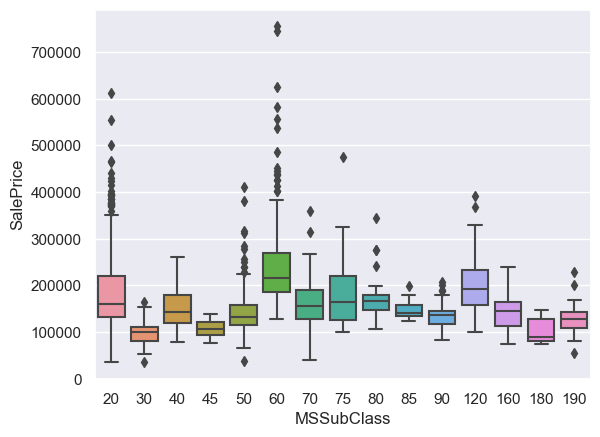

In [63]:
sb.boxplot(x = 'MSSubClass',y = 'SalePrice',data = train)

<AxesSubplot:xlabel='SalePrice', ylabel='Neighborhood'>

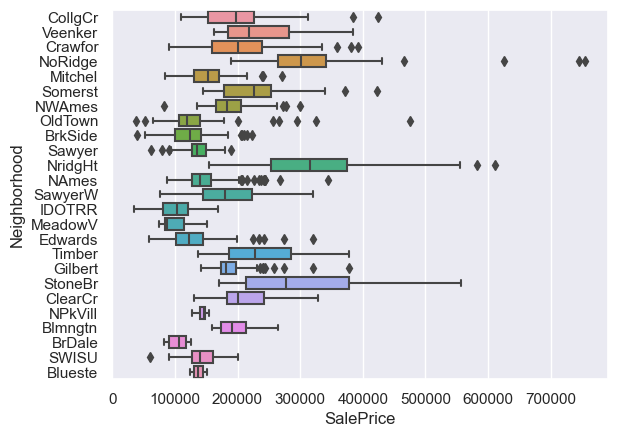

In [61]:
sb.boxplot(y = 'Neighborhood',x = 'SalePrice',data = train)

<AxesSubplot:xlabel='SalePrice', ylabel='BldgType'>

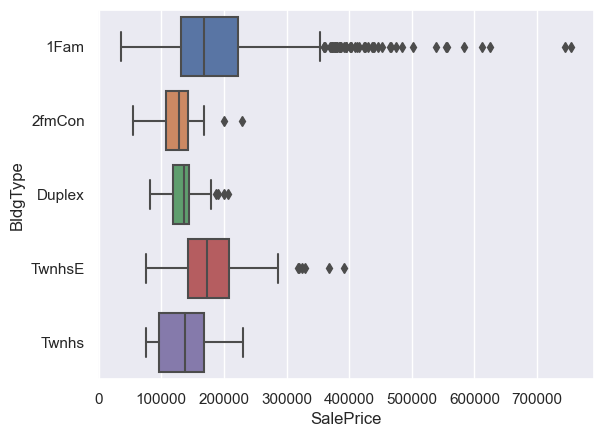

In [64]:
sb.boxplot(y = 'BldgType',x = 'SalePrice',data = train)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

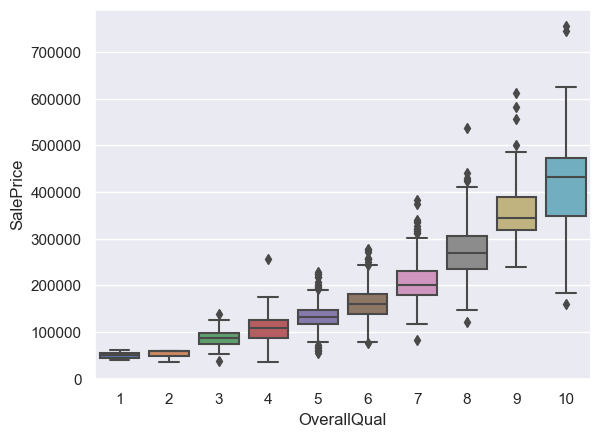

In [66]:
sb.boxplot(x = 'OverallQual',y = 'SalePrice',data = train)

Overall Qual can be used to predict SalePrice as when Overall Qual increases, SalePrice increases exponentially. Neighborhood can also be used due to it each neighborhood varying more in SalePrice than for each MSSubClass and each BldgType 

In [88]:
#GarageCond--NA, Garage Qual--NA, GarageArea--0,GarageFinish--NA, 
#GarageYrBlt--NA, GarageType--NA,               GarageCars--0??

NOG = train.loc[train['GarageArea']==0]
NOG.info()
HG = train.loc[train['GarageArea']!=0]
HG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 39 to 1453
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             81 non-null     int64  
 1   MSSubClass     81 non-null     int64  
 2   MSZoning       81 non-null     object 
 3   LotFrontage    74 non-null     float64
 4   LotArea        81 non-null     int64  
 5   Street         81 non-null     object 
 6   Alley          9 non-null      object 
 7   LotShape       81 non-null     object 
 8   LandContour    81 non-null     object 
 9   Utilities      81 non-null     object 
 10  LotConfig      81 non-null     object 
 11  LandSlope      81 non-null     object 
 12  Neighborhood   81 non-null     object 
 13  Condition1     81 non-null     object 
 14  Condition2     81 non-null     object 
 15  BldgType       81 non-null     object 
 16  HouseStyle     81 non-null     object 
 17  OverallQual    81 non-null     int64  
 18  OverallCo

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,81.000000,81.000000,74.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,...,81.000000,81.000000,81.000000,81.0,81.0,81.0,81.000000,81.000000,81.000000,81.000000
mean,707.012346,71.790123,60.405405,7469.679012,4.604938,5.530864,1942.481481,1975.172840,13.777778,240.382716,...,39.555556,36.172840,37.530864,0.0,0.0,0.0,53.703704,6.111111,2007.876543,103317.283951
std,432.877104,58.327248,22.686620,3116.165893,1.136651,1.565938,29.664841,21.743844,52.372703,331.144552,...,82.426179,81.820045,68.891234,0.0,0.0,0.0,393.365112,2.828427,1.297909,32815.023389
min,40.000000,20.000000,21.000000,1491.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,2006.000000,34900.000000
25%,308.000000,30.000000,50.000000,5586.000000,4.000000,5.000000,1920.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,4.000000,2007.000000,82500.000000
50%,639.000000,50.000000,60.000000,7711.000000,5.000000,5.000000,1940.000000,1971.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,6.000000,2008.000000,100000.000000
75%,1097.000000,90.000000,69.250000,9098.000000,5.000000,7.000000,1970.000000,1996.000000,0.000000,432.000000,...,32.000000,30.000000,30.000000,0.0,0.0,0.0,0.000000,8.000000,2009.000000,124000.000000
max,1454.000000,190.000000,153.000000,18030.000000,8.000000,9.000000,2007.000000,2008.000000,270.000000,1440.000000,...,352.000000,523.000000,286.000000,0.0,0.0,0.0,3500.000000,12.000000,2010.000000,200500.000000


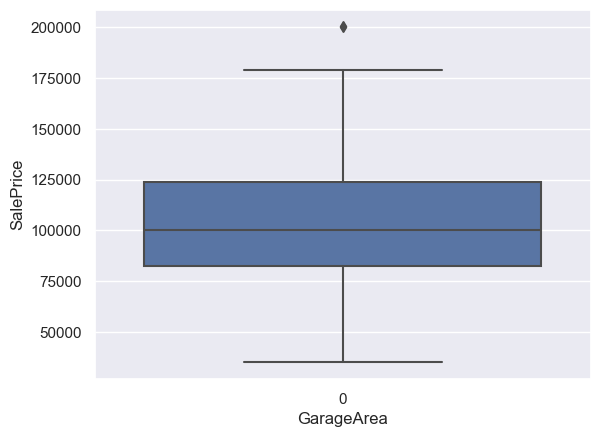

In [104]:
sb.boxplot(x = 'GarageArea',y = 'SalePrice',data = NOG)
NOG.describe()

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

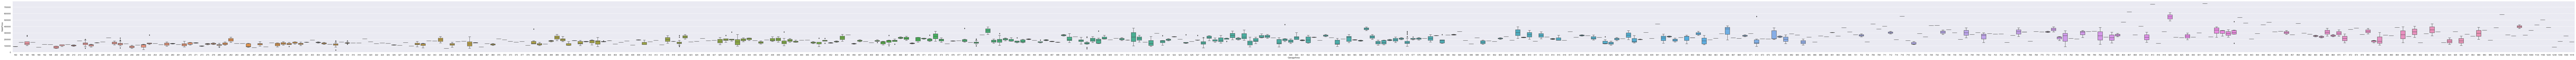

In [99]:
f = plt.figure(figsize=(250, 5))
sb.boxplot(x = 'GarageArea',y = 'SalePrice',data = HG)

In [103]:
HG.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1379.000000,1379.000000,1127.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1371.000000,1379.000000,...,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.00000
mean,731.879623,56.022480,70.683230,10695.812183,6.187092,5.577955,1972.958666,1985.435098,108.997082,455.578680,...,97.456853,47.276287,21.039159,3.609862,15.945613,2.920957,42.889050,6.334300,2007.812183,185479.51124
std,421.059059,41.026897,24.261598,10214.702133,1.345780,1.081031,29.379883,20.444852,184.545459,459.691379,...,126.699192,65.210465,60.535107,30.154682,57.249593,41.335545,501.613931,2.696674,1.330221,79023.89060
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.00000
25%,366.500000,20.000000,60.000000,7741.000000,5.000000,5.000000,1955.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,134000.00000
50%,734.000000,50.000000,70.000000,9591.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,400.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,167500.00000
75%,1094.500000,70.000000,80.000000,11708.500000,7.000000,6.000000,2001.000000,2004.000000,171.500000,732.000000,...,171.000000,69.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,217750.00000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.00000


Comparing mean and median values, it is clear that having a garage increases the SalePrice of the house.